In [1]:
from absl import logging
import tensorflow_hub as hub
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tempfile

In [5]:
print(os.path.join(tempfile.gettempdir(), "tfhub_modules"))
print(hub.__version__)
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

C:\Users\conta\AppData\Local\Temp\tfhub_modules
0.15.0



module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [6]:
#@title Compute a representation for each message, showing various lengths supported.
word = "limit"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
print(paragraph)
messages = [sentence, paragraph]

Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.


In [7]:
# Predict
def embed(input):
  return model(input)

logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:10]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))



Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.0508086271584034, -0.016524292528629303, 0.015737809240818024, -0.04286409914493561, -0.04372452571988106, -0.025361930951476097, -0.0732119157910347, 0.04079889878630638, 0.017488637939095497, 0.012179278768599033, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.028332697227597237, -0.05586221069097519, -0.012941492721438408, -0.0032210908830165863, -0.07933777570724487, -0.017642218619585037, 0.042264994233846664, 0.008285300806164742, 0.08381326496601105, 0.07212217897176743, ...]



In [10]:
messages = [
  # Smartphones
  "J'aime ma télécommande",
  "La télécommande n'est pas bonne.",
  "La télécommande ne marche pas.",

  # Weather
  "Will it snow tomorrow?",
  "Recently a lot of hurricanes have hit the US",
  "Global warming is real",

  # Food and health
  "An apple a day, keeps the doctors away",
  "Eating strawberries is healthy",
  "Est-ce que les fraises sont grasses ?",
  "Is paleo better than keto?",
  "Le gras c'est la vie",

  # Asking about age
  "I like my baby",
  "what is your age?",
  "Je n'aime pas mon bébé",
]

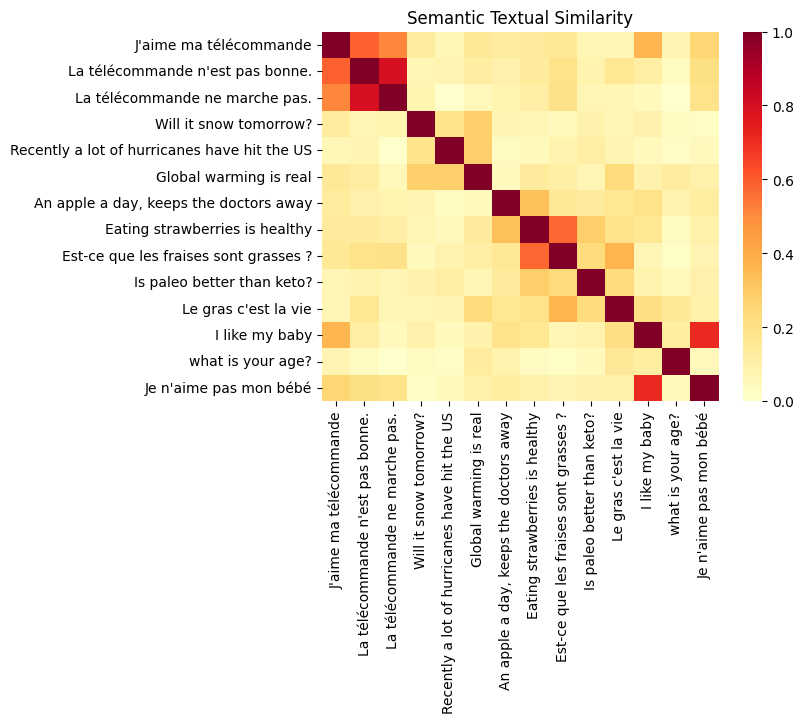

In [11]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")
  plt.show()

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

run_and_plot(messages)
